In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/vikas/Downloads/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Get the shape of the DataFrame
shape = df.shape

# Print the shape
print("Number of rows:", shape[0])
print("Number of columns:", shape[1])

Number of rows: 45211
Number of columns: 17


In [4]:
# Get basic statistics for numerical variables
statistics = df.info()

# Print the statistics
print(statistics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## **Data Preprocessing**

In [6]:
# Determine the number of distinct values for each category variable.

print(df.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64


In [7]:
# Get the column names
columns = df.columns

# Print the column names
print(columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


In [8]:
# Get the row types
rows = df.dtypes

print(rows)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


In [9]:
# Identify null values and count them for each column
null_counts = df.isnull().sum()

# Print the counts of null values for each column
print(null_counts)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


There are **no null values** in the data set.

## **Data Analysis**

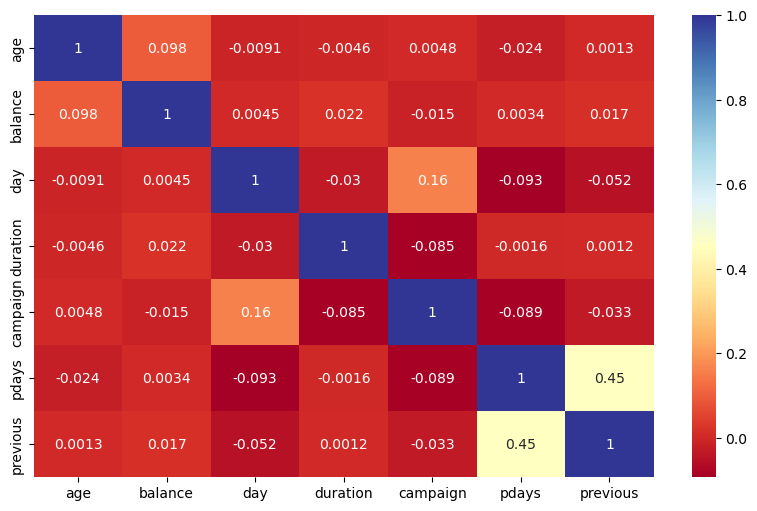

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlBu')
plt.show()

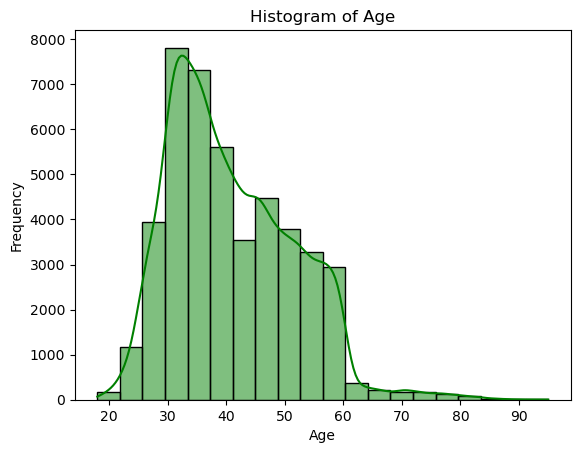

In [11]:
# Plot a histogram of the 'age' variable using Seaborn
sns.histplot(data=df, x='age', bins=20, kde=True, color='Green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

From the graph above we can observe that most of the clients of the bank are in age range between **30 to 40 years**.

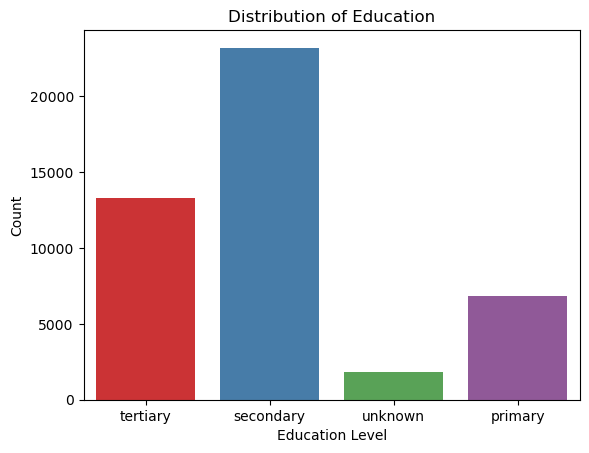

In [12]:
# Create a countplot for 'education'
sns.countplot(x='education', data=df, palette='Set1')
plt.title('Distribution of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

Most of the clients of the bank have completed their **secondary education**.

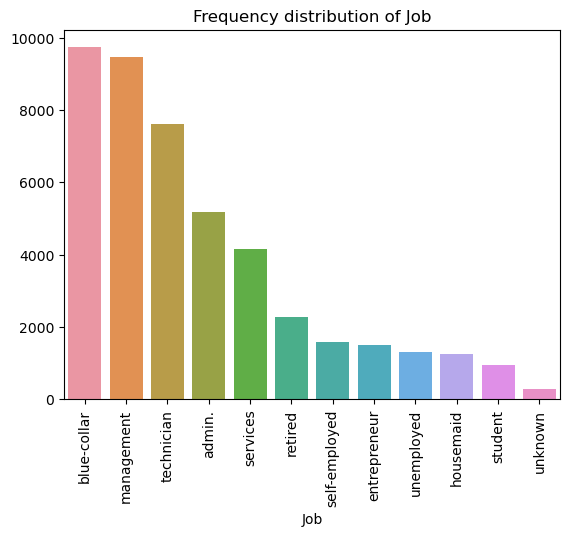

In [13]:
# Count the frequency of each 'job' category
job_counts = df['job'].value_counts()
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.xlabel('Job')
plt.title('Frequency distribution of Job')
plt.xticks(rotation=90)
plt.show()

From the graph above we can see that clients holding **blue-collar jobs** are the highest and next comes **management** and then **technician**.

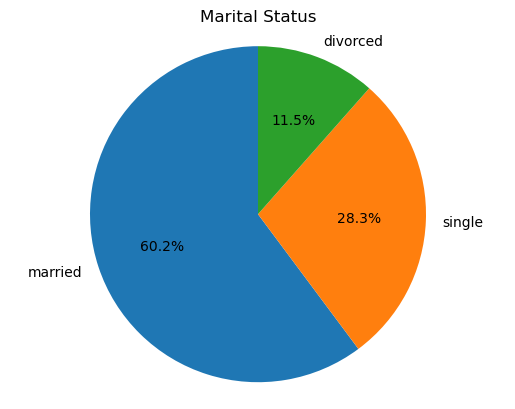

In [14]:
# Count the frequency of each marital status
marital_counts = df['marital'].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Marital Status')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

**Above 60.2% of the clients are married, 28.3% are single and 11.5% are devorced**

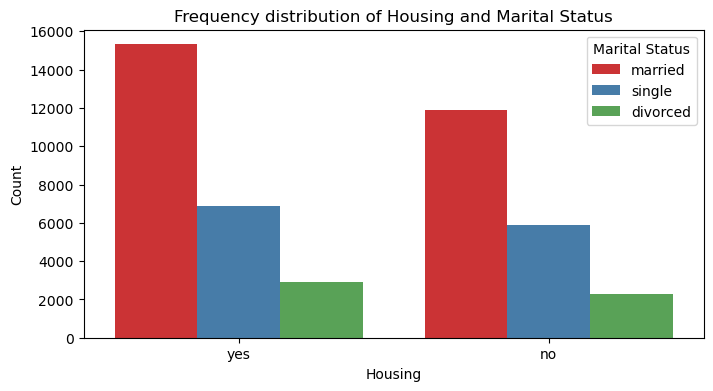

In [15]:
# Create a stacked bar chart with different colors
plt.figure(figsize=(8, 4))
sns.countplot(x='housing', hue='marital', data=df, palette='Set1')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Frequency distribution of Housing and Marital Status')
plt.legend(title='Marital Status', loc='upper right')
plt.show()

We plotted clients who had taken out loans and the frequency with which they were married in the graph above. We can see that married customers are more likely to take out home loans, and if any schemes are related to home loans or are family-oriented, they could be potential leads.

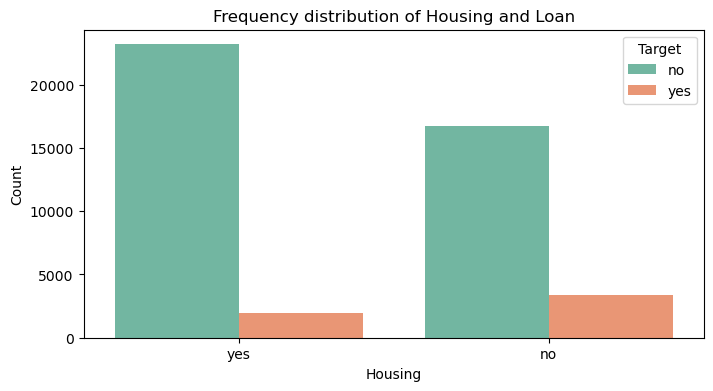

In [16]:
# Create a stacked bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='housing', hue='Target', data=df, palette='Set2')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Frequency distribution of Housing and Loan')
plt.show()

We have categorised our clients in the above graph based on whether or not they have an a loan, and we have also highlighted which of these customers may be good prospects for the bank's future initiatives. The graph indicates that a significant portion of consumers without loans are considered worthy candidates for future lending offers. This could imply that the bank would specifically target these clients with its marketing campaigns, possibly offering them home loan programmes or other financial products.

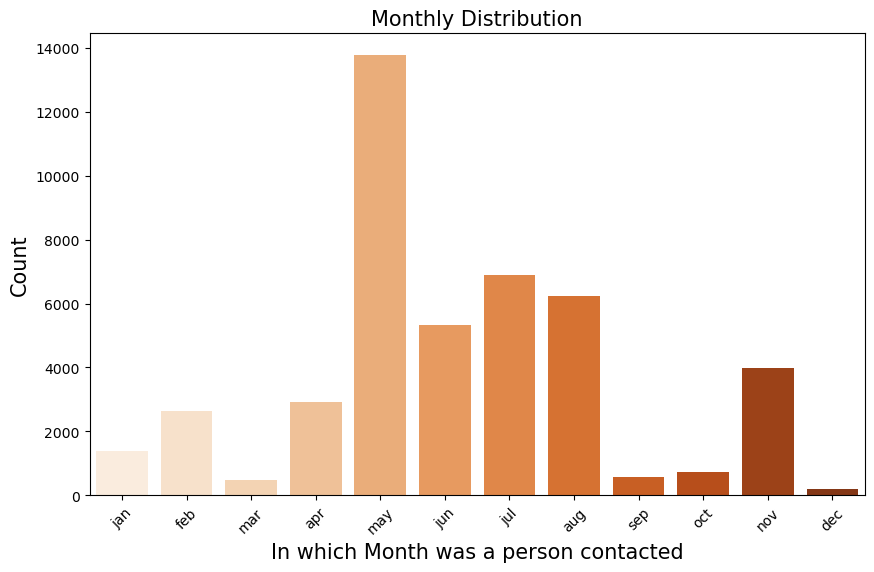

In [17]:
# Create a countplot for the 'month' variable
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, palette='Oranges', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.xlabel('In which Month was a person contacted', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)
plt.xticks(rotation=45)
plt.show()

The above graph indicates that most clients are contacted in **May**. We advise the bank to contact more clients each month because the more connections it has, the greater the likelihood that it will discover new targets.

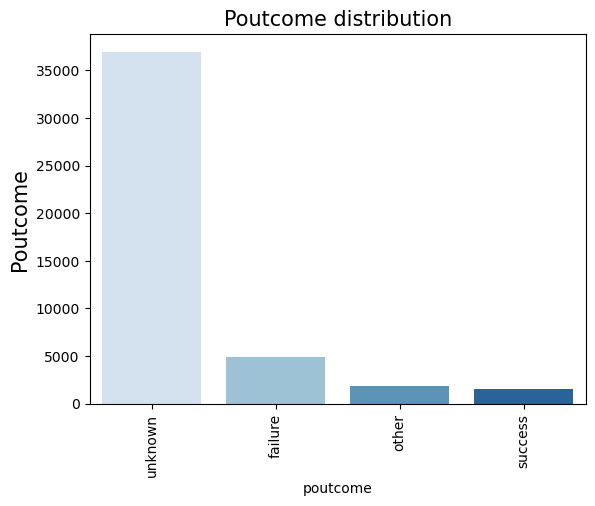

In [18]:
sns.countplot(x='poutcome', data=df, palette='Blues')
plt.ylabel('Poutcome', fontsize=15)
plt.title('Poutcome distribution', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Poutcome stands for the campaign's previous result. It is evident that the data is not readily available, and obtaining the right data would yield more robust analytical outcomes.

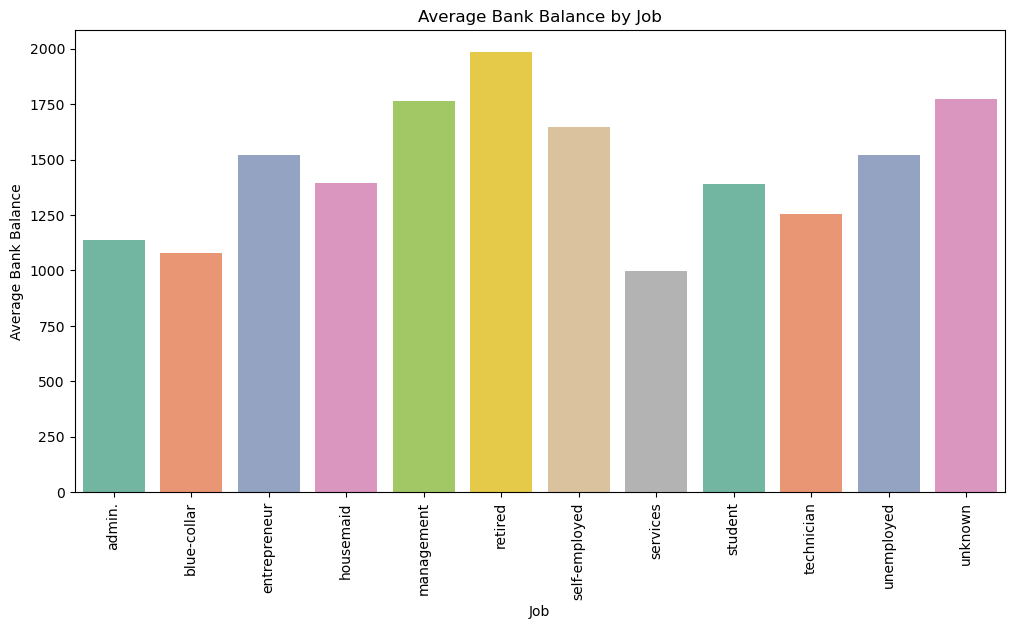

In [19]:
# Group data by job and calculate mean bank balance
grouped_data = df.groupby('job')['balance'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='job', y='balance', data=grouped_data, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Average Bank Balance')
plt.title('Average Bank Balance by Job')
plt.show()

The bank's retired clients have the highest average bank balance, as can be seen in the graph above. which makes sense considering their longer career and greater savings.

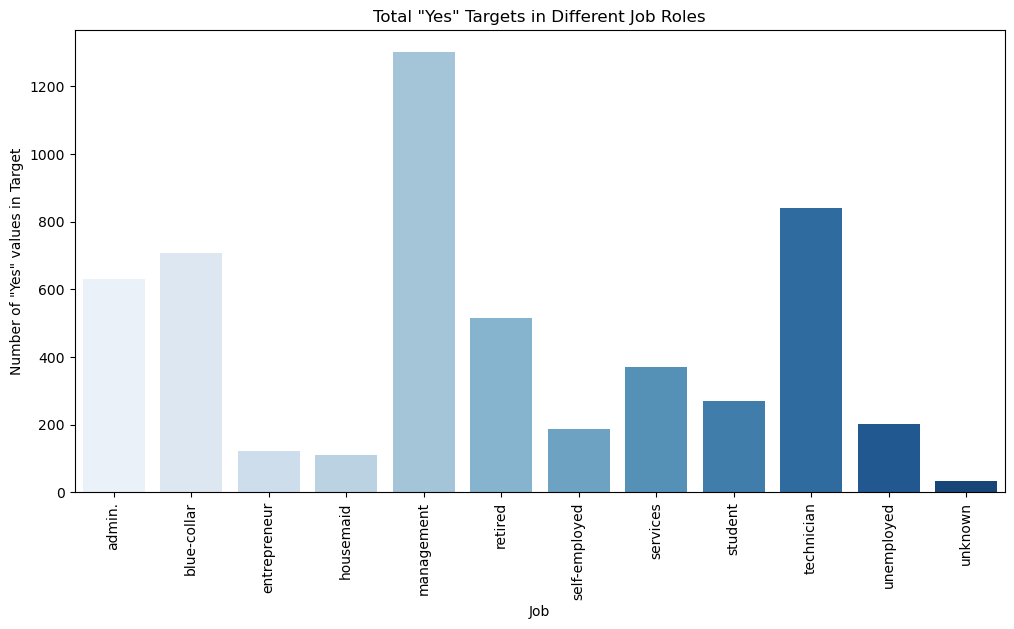

In [20]:
# Filter the DataFrame for "Target" values equal to "yes"
df_yes = df[df['Target'] == 'yes']

# Group the data by job and count the number of "yes" values
grouped_data = df_yes.groupby('job')['Target'].count()

plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette="Blues")
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Number of "Yes" values in Target')
plt.title('Total "Yes" Targets in Different Job Roles')
plt.show()

The average number of Yes answers in the goals is compared to the job category in the above graph. It's evident that managers have the highest scheme or term purchases and make excellent leaders. It has the lowest unemployment rate. Blue collar workers come in second, followed by technicians.

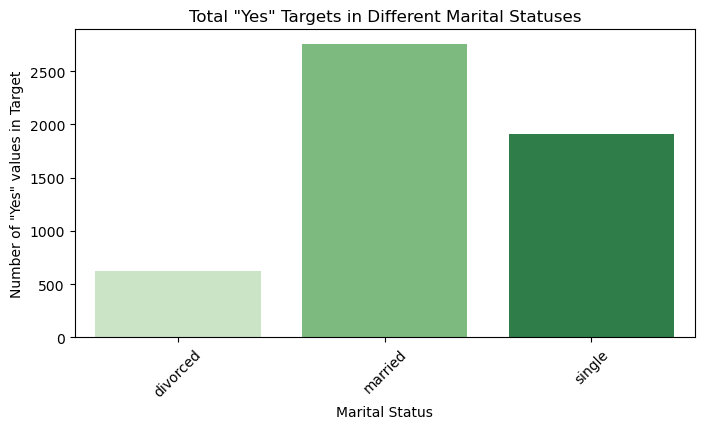

In [21]:
# Group the data by marital status and count the number of "yes" values
grouped_data = df_yes.groupby('marital')['Target'].count()
plt.figure(figsize=(8, 4))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='Greens')
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Number of "Yes" values in Target')
plt.title('Total "Yes" Targets in Different Marital Statuses')
plt.show()

According to the graph above, married consumers approve or acquire the strategy or proposals.

## **Removing Outliers**

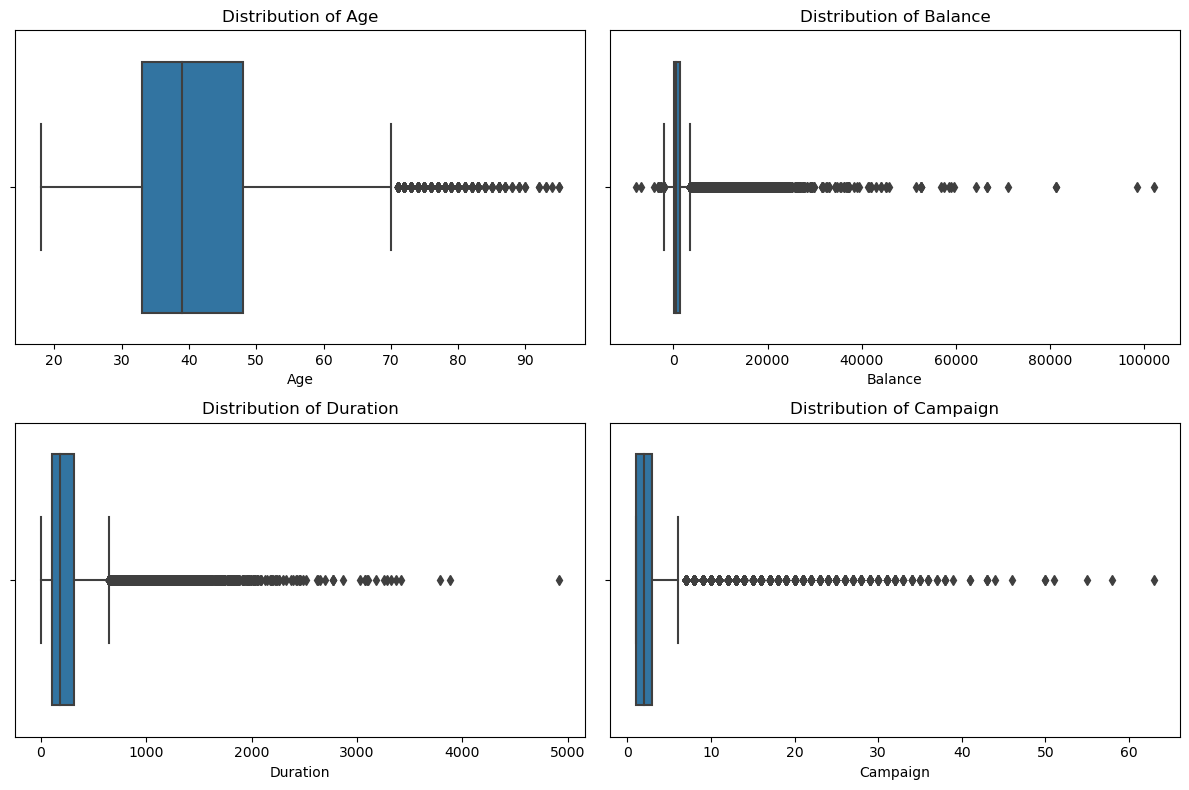

In [22]:
plt.figure(figsize=(12, 8))

# Create the first box plot for 'age'
plt.subplot(2, 2, 1)
sns.boxplot(x='age', data=df)
plt.xlabel('Age')
plt.title('Distribution of Age')

# Create the second box plot for 'balance'
plt.subplot(2, 2, 2)
sns.boxplot(x='balance', data=df)
plt.xlabel('Balance')
plt.title('Distribution of Balance')

# Create the third box plot for 'duration'
plt.subplot(2, 2, 3) 
sns.boxplot(x='duration', data=df)
plt.xlabel('Duration')
plt.title('Distribution of Duration')

# Create the fourth box plot for 'campaign'
plt.subplot(2, 2, 4)
sns.boxplot(x='campaign', data=df)
plt.xlabel('Campaign')
plt.title('Distribution of Campaign')


plt.tight_layout()
plt.show()

In [23]:
print('Shape of the original dataframe:', df.shape)

# Remove outliers from 'age'
q1_age = df['age'].quantile(0.25)
q3_age = df['age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_age = q1_age - 1.5 * iqr_age
upper_age = q3_age + 1.5 * iqr_age
df = df[(df['age'] >= lower_age) & (df['age'] <= upper_age)]

# Remove outliers from 'balance'
q1_bal = df['balance'].quantile(0.25)
q3_bal = df['balance'].quantile(0.75)
iqr_bal = q3_bal - q1_bal
lower_bal = q1_bal - 1.5 * iqr_bal
upper_bal = q3_bal + 1.5 * iqr_bal
df = df[(df['balance'] >= lower_bal) & (df['balance'] <= upper_bal)]

#remove outliers from duration
q1_dur = df['duration'].quantile(0.25)
q3_dur = df['duration'].quantile(0.75)
iqr_dur = q3_dur - q1_dur
lower_dur = q1_dur - 1.5*iqr_dur
upper_dur = q1_dur + 1.5*iqr_dur
df = df[(df['duration'] >= lower_bal) & (df['duration'] <= upper_bal)]

#remove outliers from campaign
q1_cam = df['campaign'].quantile(0.25)
q3_cam = df['campaign'].quantile(0.75)
iqr_cam = q3_cam - q1_cam
lower_cam = q1_cam - 1.5*iqr_cam
upper_cam = q1_cam + 1.5*iqr_cam
df = df[(df['campaign'] >= lower_bal) & (df['campaign'] <= upper_bal)]

#remove outliers from pdays
q1_pdays = df['pdays'].quantile(0.25)
q3_pdays = df['pdays'].quantile(0.75)
iqr_pdays = q3_pdays - q1_pdays
lower_pdays = q1_pdays - 1.5*iqr_pdays
upper_pdays = q1_pdays + 1.5*iqr_pdays
df = df[(df['pdays'] >= lower_bal) & (df['pdays'] <= upper_bal)]

#remove outliers from previous
q1_pre = df['previous'].quantile(0.25)
q3_pre = df['previous'].quantile(0.75)
iqr_pre = q3_pre - q1_pre
lower_pre = q1_pre - 1.5*iqr_pre
upper_pre = q1_pre + 1.5*iqr_pre
df = df[(df['previous'] >= lower_bal) & (df['previous'] <= upper_bal)]


print('Shape of the dataframe after removing outliers:', df.shape)

Shape of the original dataframe: (45211, 17)
Shape of the dataframe after removing outliers: (40025, 17)


In [24]:
#transforming all categorical values into numerical values

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of categorical columns to be encoded
df_columns = ['job', 'marital', 'education', 'default', 'housing', 
              'loan', 'poutcome', 'Target', 'contact', 'month']

# Apply label encoding to each categorical column
for column in df_columns:
    df[column] = label_encoder.fit_transform(df[column])
    
    # Get the mapping of encoded values to original categorical variables
    mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
    print(f"{column}: {mapping}\n")


job: {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}

marital: {0: 'divorced', 1: 'married', 2: 'single'}

education: {0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

default: {0: 'no', 1: 'yes'}

housing: {0: 'no', 1: 'yes'}

loan: {0: 'no', 1: 'yes'}

poutcome: {0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}

Target: {0: 'no', 1: 'yes'}

contact: {0: 'cellular', 1: 'telephone', 2: 'unknown'}

month: {0: 'apr', 1: 'aug', 2: 'dec', 3: 'feb', 4: 'jan', 5: 'jul', 6: 'jun', 7: 'mar', 8: 'may', 9: 'nov', 10: 'oct', 11: 'sep'}



In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', "{:.2%}".format(accuracy))

Accuracy: 90.37%


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model using accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Classifier Accuracy:', "{:.2%}".format(accuracy_rf))

Random Forest Classifier Accuracy: 91.61%


In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Evaluate the model using accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Classifier Accuracy:', "{:.2%}".format(accuracy_dt))

Decision Tree Classifier Accuracy: 88.72%


In [29]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes Classifier
gnb_classifier = GaussianNB()

# Fit the model on the training data
gnb_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_gnb = gnb_classifier.predict(X_test_scaled)

# Evaluate the model using accuracy score
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print('Gaussian Naive Bayes Classifier Accuracy:', "{:.2%}".format(accuracy_gnb))

Gaussian Naive Bayes Classifier Accuracy: 85.13%


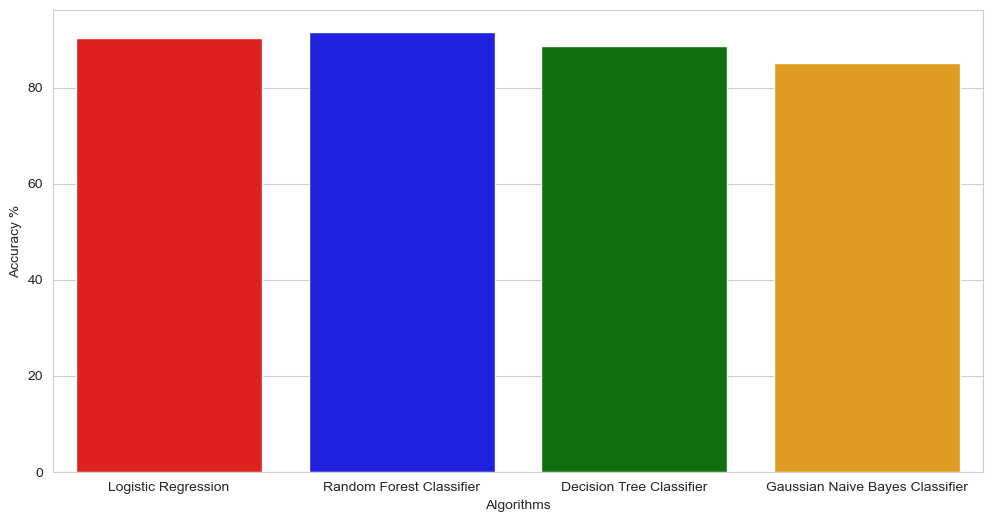

In [30]:
accuracy = {
    'Logistic Regression': 90.37,
    'Random Forest Classifier': 91.61,
    'Decision Tree Classifier': 88.72,
    'Gaussian Naive Bayes Classifier': 85.13
}

colors = ['Red', 'Blue', 'Green', 'Orange']

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.ylabel('Accuracy %')
plt.xlabel('Algorithms')
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette=colors)
plt.show()